# **Chapter 2 - Creating and joining GeoDataFrames**

## **Colormaps**


When you want to differentiate regions, but not imply any type of relationship between the regions, a qualitative colormap is the best choice. In this exercise you'll compare a qualitative colormap to a sequential (quantitative) colormap using the school districts GeoDataFrame, which is available for you as school_districts

In [17]:
import matplotlib.pyplot as plt
import geopandas as gpd 
import pandas as pd

In [5]:
school_districts = gpd.read_file('/content/school_districts.geojson')
school_districts.head()

,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,"MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ..."
1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234,"MULTIPOLYGON (((-86.75365 36.40428, -86.75353 ..."
2,Dr. Jo Ann,Nashville,37220,joann.brannon@mnps.org,TN,Brannon,5444 San Marcos Drive,Member,2018,2,615-833-5976,"MULTIPOLYGON (((-86.76696 36.08333, -86.76590 ..."
3,Anna,Hermitage,37076,anna.shepherd@mnps.org,TN,Shepherd,4545 Raccoon Trail,Chair,2018,4,615-210-3768,"MULTIPOLYGON (((-86.58098 36.20935, -86.58099 ..."
4,Amy,Nashville,37221,amy.frogge@mnps.org,TN,Frogge,7237 Riverfront Drive,Member,2016,9,615-521-5650,"MULTIPOLYGON (((-86.97287 36.20828, -86.97045 ..."


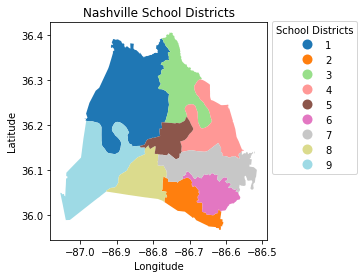

In [6]:
# Set legend style
lgnd_kwds = {'title': 'School Districts',
               'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}

# Plot the school districts using the tab20 colormap (qualitative)
school_districts.plot(column = 'district', cmap = 'tab20', legend = True, legend_kwds  = lgnd_kwds)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Nashville School Districts')
plt.show();

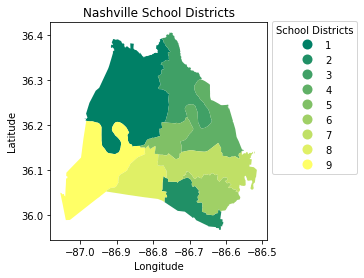

In [7]:
# Set legend style
lgnd_kwds = {'title': 'School Districts',
               'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}

# Plot the school districts using the summer colormap (sequential)
school_districts.plot(column = 'district', cmap = 'summer', legend = True, legend_kwds = lgnd_kwds)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Nashville School Districts')
plt.show();

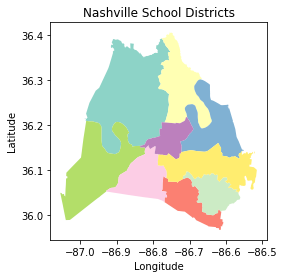

In [8]:
# Set legend style
lgnd_kwds = {'title': 'School Districts',
               'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}

# Plot the school districts using Set3 colormap without the column argument
school_districts.plot(cmap = 'Set3', legend = True, legend_kwds = lgnd_kwds)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Nashville School Districts')
plt.show();

## **Map Nashville neighborhoods**


This time you'll read a GeoJSON file in to a GeoDataFrame to take a quick peek at where Nashville neighborhoods are.

In [10]:
# Read in the neighborhoods geojson file
neighborhoods = gpd.read_file('/content/neighborhoods.geojson')

# Print the first few rows of neighborhoods
neighborhoods.head()

,name,geometry
0,Historic Buena Vista,"MULTIPOLYGON (((-86.79511 36.17576, -86.79403 ..."
1,Charlotte Park,"MULTIPOLYGON (((-86.87460 36.15758, -86.87317 ..."
2,Hillwood,"MULTIPOLYGON (((-86.87614 36.13554, -86.87583 ..."
3,West Meade,"MULTIPOLYGON (((-86.90384 36.12554, -86.90328 ..."
4,White Bridge,"MULTIPOLYGON (((-86.86321 36.12886, -86.86321 ..."


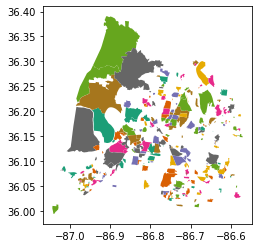

In [11]:
# Plot the neighborhoods, color according to name and use the Dark2 colormap
neighborhoods.plot(column = 'name', cmap = 'Dark2')

# Show the plot.
plt.show()

## **Changing coordinate reference systems**


In this exercise you will learn how to find a GeoDataFrame's coordinate reference system and how to change it. The school districts GeoDataFrame is available as school_districts

In [12]:
school_districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
school_districts.head(1)

,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,"MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ..."


In [16]:
# Convert the crs to epsg:3857
school_districts.geometry = school_districts.geometry.to_crs(epsg = 3857)
                        
# Print the first row of school districts GeoDataFrame and the crs again
school_districts.head(1)

,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,"MULTIPOLYGON (((-9659344.056 4353528.767, -965..."


In [15]:
school_districts.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## **Construct a GeoDataFrame from a DataFrame**


In this exercise, you will construct a geopandas GeoDataFrame from the Nashville Public Art DataFrame. You will need to import the Point constructor from the shapely.geometry module to create a geometry column in art before you can create a GeoDataFrame from art. This will get you ready to spatially join the art data and the neighborhoods data in order to discover which neighborhood has the most art.

In [18]:
art = pd.read_excel('art.xlsx')
art.head()

,title,last_name,first_name,address,medium,type,desc,lat,lng,loc
0,[Cross Country Runners],Frost,Miley,"4001 Harding Rd., Nashville TN",Bronze,Sculpture,NaN,36.129,-86.837,"(36.12856, -86.8366)"
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.162,-86.778,"(36.16234, -86.77774)"
2,12th & Porter Mural,Kennedy,Kim,114 12th Avenue N,Porter all-weather outdoor paint,Mural,Kim Kennedy is a musician and visual artist wh...,36.158,-86.788,"(36.1579, -86.78817)"
3,A Splash of Color,Stevenson and Stanley and ROFF (Harroff),Doug and Ronnica and Lynn,616 17th Ave. N.,"Steel, brick, wood, and fabric on frostproof c...",Mural,Painted wooden hoop dancer on a twenty foot po...,36.162,-86.800,"(36.16202, -86.79975)"
4,A Story of Nashville,Ridley,Greg,"615 Church Street, Nashville TN",Hammered copper repousse,Frieze,"Inside the Grand Reading Room, this is a serie...",36.162,-86.782,"(36.16215, -86.78205)"


In [19]:
from shapely.geometry import Point

# Create a geometry column from lng & lat
art['geometry'] = art.apply(lambda x: Point(float(x.lng), float(x.lat)), axis=1)

# Create a GeoDataFrame from art and verify the type
art_geo = gpd.GeoDataFrame(art, crs = neighborhoods.crs, geometry = art.geometry)
type(art_geo)

geopandas.geodataframe.GeoDataFrame

In [20]:
art_geo.head()

,title,last_name,first_name,address,medium,type,desc,lat,lng,loc,geometry
0,[Cross Country Runners],Frost,Miley,"4001 Harding Rd., Nashville TN",Bronze,Sculpture,NaN,36.129,-86.837,"(36.12856, -86.8366)",POINT (-86.83700 36.12900)
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.162,-86.778,"(36.16234, -86.77774)",POINT (-86.77800 36.16200)
2,12th & Porter Mural,Kennedy,Kim,114 12th Avenue N,Porter all-weather outdoor paint,Mural,Kim Kennedy is a musician and visual artist wh...,36.158,-86.788,"(36.1579, -86.78817)",POINT (-86.78800 36.15800)
3,A Splash of Color,Stevenson and Stanley and ROFF (Harroff),Doug and Ronnica and Lynn,616 17th Ave. N.,"Steel, brick, wood, and fabric on frostproof c...",Mural,Painted wooden hoop dancer on a twenty foot po...,36.162,-86.800,"(36.16202, -86.79975)",POINT (-86.80000 36.16200)
4,A Story of Nashville,Ridley,Greg,"615 Church Street, Nashville TN",Hammered copper repousse,Frieze,"Inside the Grand Reading Room, this is a serie...",36.162,-86.782,"(36.16215, -86.78205)",POINT (-86.78200 36.16200)


## **Spatial join practice**


Is there a difference between art (point data) that intersects with neighborhoods (polygon data) and art (point data) within neighborhoods (polygon data)? Explore different spatial joins with the art_geo and neighborhoods GeoDataFrames, which has been pre-loaded for you.

Write a spatial join to find the art in art_geo that intersects with neighborhoods. Call this art_intersect_neighborhoods and print the .shape property to see how many rows and columns resulted.

In [25]:
# Spatially join art_geo and neighborhoods 
art_intersect_neighborhoods = gpd.sjoin(art_geo, neighborhoods, predicate = 'intersects')

# Print the shape property of art_intersect_neighborhoods
art_intersect_neighborhoods.shape

(39, 13)

In [23]:
art_intersect_neighborhoods.head()

,title,last_name,first_name,address,medium,type,desc,lat,lng,loc,geometry,index_right,name
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.162,-86.778,"(36.16234, -86.77774)",POINT (-86.77800 36.16200),41,Urban Residents
4,A Story of Nashville,Ridley,Greg,"615 Church Street, Nashville TN",Hammered copper repousse,Frieze,"Inside the Grand Reading Room, this is a serie...",36.162,-86.782,"(36.16215, -86.78205)",POINT (-86.78200 36.16200),41,Urban Residents
21,Chet Atkins,Faxon,Russell,"Corner of Fifth Avenue North and Union Street,...",Bronze stool and guitar on a granite plynth,Sculpture,A sculpture of a young Chet Atkins seated on a...,36.165,-86.781,"(36.16466, -86.78102)",POINT (-86.78100 36.16500),41,Urban Residents
22,Children's Chairs For The Seasons,McGraw,Deloss,"615 Church Street, Nashville TN",Mixed Media - wood and paint,Furniture,chairs depicting the four seasons,36.162,-86.782,"(36.16215, -86.78205)",POINT (-86.78200 36.16200),41,Urban Residents
34,Foliated Scroll,Bloomer,Kent,"615 Church Street, Nashville TN",Aluminum,Frieze,a contemporary adaptation of a classical folia...,36.162,-86.782,"(36.16215, -86.78205)",POINT (-86.78200 36.16200),41,Urban Residents


Now write a spatial join to find the art in art_geo that is within neighborhoods. Call this art_within_neighborhoods and take a look at the .shape property to see how many rows and columns resulted.

In [26]:
# Create art_within_neighborhoods by spatially joining art_geo and neighborhoods
art_within_neighborhoods = gpd.sjoin(art_geo, neighborhoods, predicate = 'within')

# Print the shape property of art_within_neighborhoods
art_within_neighborhoods.shape

(39, 13)

Finally, write a spatial join to find the art locations in art_geo that contain neighborhoods. Call this GeoDataFrame art_containing_neighborhoods and take a look at the .shape property to see how many rows and columns resulted.

In [27]:
# Spatially join art_geo and neighborhoods and using the contains op
art_containing_neighborhoods = gpd.sjoin(art_geo, neighborhoods, predicate = 'contains')

# Print the shape property of art_containing_neighborhoods
art_containing_neighborhoods.shape

(0, 13)

## **Finding the neighborhood with the most public art**


Now that you have created art_geo, a GeoDataFrame, from the art DataFrame, you can join it spatially to the neighborhoods data to see what art is in each neighborhood.

In [30]:
# Spatially join neighborhoods with art_geo
neighborhood_art = gpd.sjoin(art_geo, neighborhoods, predicate = "within")

# Print the first few rows
neighborhood_art.head()

,title,last_name,first_name,address,medium,type,desc,lat,lng,loc,geometry,index_right,name
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.162,-86.778,"(36.16234, -86.77774)",POINT (-86.77800 36.16200),41,Urban Residents
4,A Story of Nashville,Ridley,Greg,"615 Church Street, Nashville TN",Hammered copper repousse,Frieze,"Inside the Grand Reading Room, this is a serie...",36.162,-86.782,"(36.16215, -86.78205)",POINT (-86.78200 36.16200),41,Urban Residents
21,Chet Atkins,Faxon,Russell,"Corner of Fifth Avenue North and Union Street,...",Bronze stool and guitar on a granite plynth,Sculpture,A sculpture of a young Chet Atkins seated on a...,36.165,-86.781,"(36.16466, -86.78102)",POINT (-86.78100 36.16500),41,Urban Residents
22,Children's Chairs For The Seasons,McGraw,Deloss,"615 Church Street, Nashville TN",Mixed Media - wood and paint,Furniture,chairs depicting the four seasons,36.162,-86.782,"(36.16215, -86.78205)",POINT (-86.78200 36.16200),41,Urban Residents
34,Foliated Scroll,Bloomer,Kent,"615 Church Street, Nashville TN",Aluminum,Frieze,a contemporary adaptation of a classical folia...,36.162,-86.782,"(36.16215, -86.78205)",POINT (-86.78200 36.16200),41,Urban Residents


## **Aggregating points within polygons**


Now that you have spatially joined art and neighborhoods, you can group, aggregate, and sort the data to find which neighborhood has the most public art. You can count artwork titles to see how many artworks are in each neighborhood.

In [31]:
# Get name and title from neighborhood_art and group by name
neighborhood_art_grouped = neighborhood_art[['name', 'title']].groupby('name')

# Aggregate the grouped data and count the artworks within each polygon
neighborhood_art_grouped.agg('count').sort_values(by = 'title', ascending = False)

,title
name,
Urban Residents,21
Lockeland Springs,3
Edgehill (ONE),2
Germantown,2
Inglewood,2
Sunnyside,2
Chestnut Hill (TAG),1
Hillsboro-West End,1
Historic Edgefield,1


## **Plotting the Urban Residents neighborhood and art**


Now you know that most art is in the Urban Residents neighborhood. In this exercise, you'll create a plot of art in that neighborhood. First you will subset just the urban_art from neighborhood_art and you'll subset the urban_polygon from neighborhoods. Then you will create a plot of the polygon as ax before adding a plot of the art.

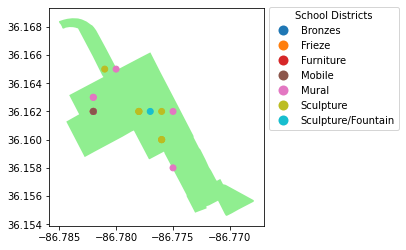

In [33]:
# Create urban_art from neighborhood_art where the neighborhood name is Urban Residents
urban_art = neighborhood_art.loc[neighborhood_art.name == "Urban Residents"]

# Get just the Urban Residents neighborhood polygon and save it as urban_polygon
urban_polygon = neighborhoods.loc[neighborhoods.name == "Urban Residents"]

# Plot the urban_polygon as ax 
ax = urban_polygon.plot(color = 'lightgreen')

# Add a plot of the urban_art and show it
lgnd_kwds = {'title': 'School Districts',
               'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}
urban_art.plot( ax = ax, column = 'type', legend = True, legend_kwds  = lgnd_kwds);
plt.show()